<div style="text-align: center;">
  <h3>Time Series Analysis</h3>
  <h5>Summative Assessment 1</h5>
    <h5><u>By Jordan Dacanay</u></h5>
    <h5><u>By Romand Lansangan</u></h5>
    <h5><u>By Zion Ramilo</u></h5>
    <h5><u>By Jinghua Yang</u></h5>
</div>

You are a team of consultants hired by different companies who want to better understand and forecast their performance data. Each company has given you their historical dataset. Your task is to analyze the data, test assumptions, and determine the most appropriate time series methods and models to apply.


## **[Individual Github Link](https://github.com/RomandRapido/APM1215-TimeSeries/tree/main/SA1_Dacanay_Lansangan_Ramilo_Yang)**

---

## **Watcher Market** (Zion Ramilo)


### **Data Exploration**

In [ ]:
# Import the data
watcher_perf <- read_csv("TimeSeries_Dataset4.csv") %>%
  arrange(Month)
str(watcher_perf)
watcher_perf_ts <- ts(watcher_perf$Index,start=c(2018,1),end=c(2020,12),frequency = 12)

Rows: 36 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (1): Index
date (1): Month

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [36 × 2] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Month: Date[1:36], format: "2018-01-31" "2018-02-28" ...
 $ Index: num [1:36] 39 43.3 52 44.1 52.5 ...
 - attr(*, "spec")=
  .. cols(
  ..   Month = col_date(format = ""),
  ..   Index = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [ ]:
t(describe(watcher_perf$Index))

,X1
vars,1.00000000
n,36.00000000
mean,87.40233131
sd,28.50795917
median,85.56692226
trimmed,87.27756702
mad,36.54386908
min,39.00961698
max,143.13435244
range,104.12473545


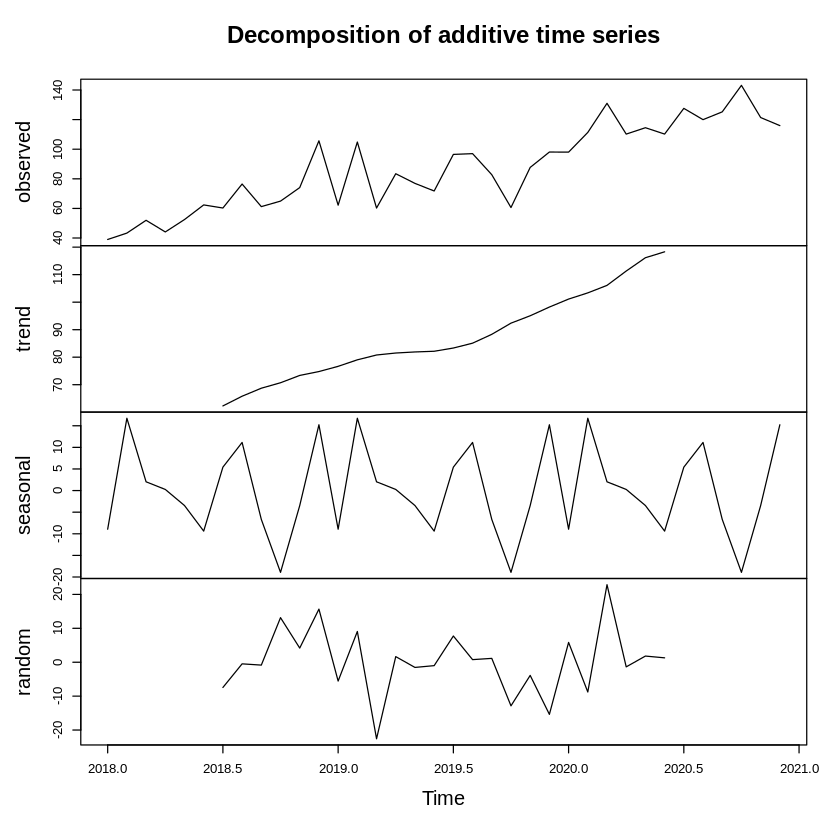

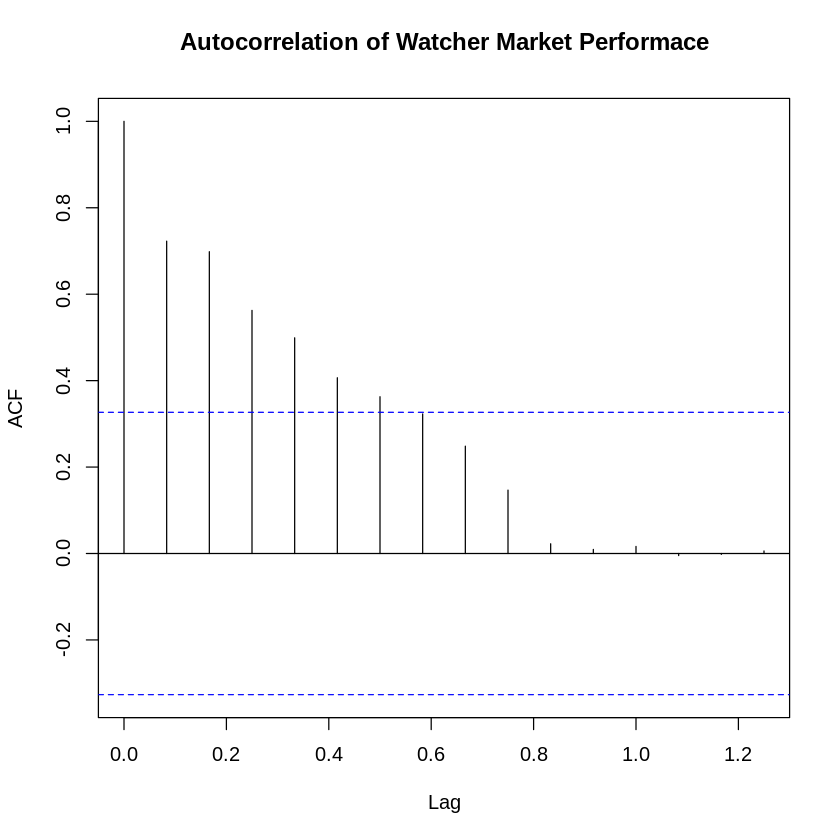

In [ ]:
decompose(watcher_perf_ts) %>%
  plot()
acf(watcher_perf_ts,main = "Autocorrelation of Watcher Market Performace")

Warning message in fortify(data, ...):
“Arguments in `...` must be used.
✖ Problematic argument:
• na.rm = TRUE
ℹ Did you misspell an argument name?”


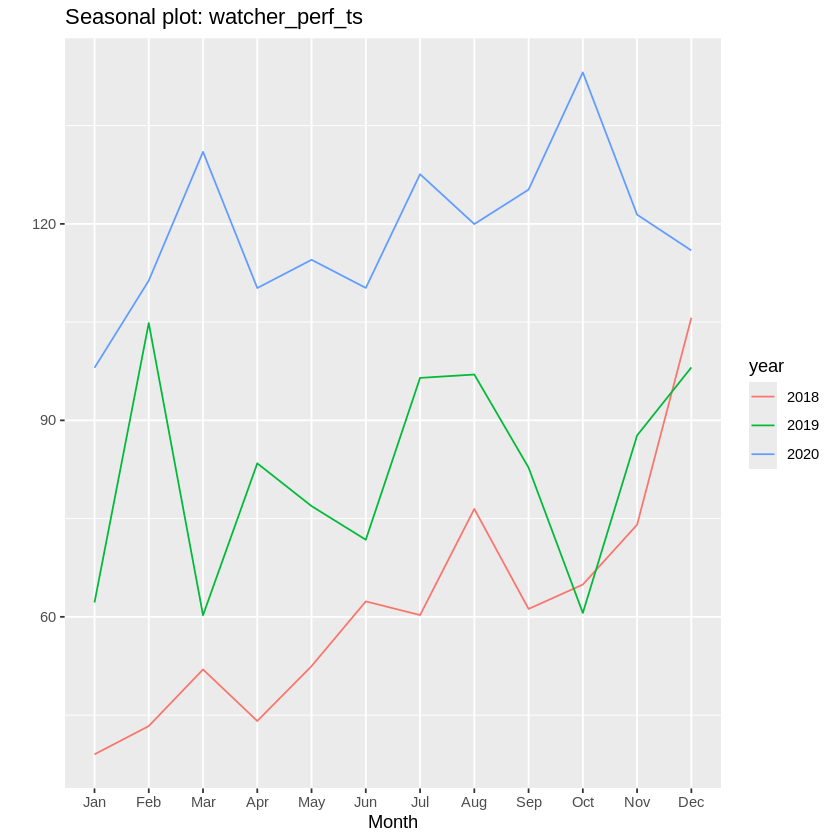

In [ ]:
ggseasonplot(watcher_perf_ts)

First we have to decompose our series into different visualizations in order to determine the trend, identify whether or nt there is seasonality, the noise it is providing, and the general behavior of the series.

We can observe with the decomposition the strong positive trend that the series is providing this indicates the series has a trend we can use as a hint to what model and appropriate measures we can anticipate within the proceeding sections of the analysis.

We can also observe that there is an obscure seasonality wihtin the model however, this cannot be appropriately seen within the overall visualization, in order to illustrate whether or not there is seasonality within the series a seperate visualization was conducted in order to determine if there are repeating patterns that shows itself within the series, we can observe by the given figure above that there are no given patterns of seasonality and has large variations through out the different years.

This trend was also seen within the autocorrolation plot where we can observe a downard ACF value as the lag increases, we can observe as well that from 0 to 0.5 the ACF or autocorrolation of  values is significant while 0.5 onward shows no siggn of significant autocorrolation.

### **Assumption Testing**

In [ ]:
# Stationary assumption
adf.test(watcher_perf_ts)


	Augmented Dickey-Fuller Test

data:  watcher_perf_ts
Dickey-Fuller = -2.6946, Lag order = 3, p-value = 0.3029
alternative hypothesis: stationary


In [ ]:
watcher_perf_ts_diff <- diff(watcher_perf_ts)
adf.test(watcher_perf_ts_diff)


	Augmented Dickey-Fuller Test

data:  watcher_perf_ts_diff
Dickey-Fuller = -3.8274, Lag order = 3, p-value = 0.03017
alternative hypothesis: stationary


Through the Augmented Dickey-Fuller Test we define the null hypothesis and alternative hypothesis to be the following:
$$H_0: \text{The series is not stationary}\\H_1: \text{The series is stationary}$$

We can observe with the first test the series is not stationary, which implies that the mean and variance of the data changes as time progresses, which is a reasonable outcome given the proted values show a linear trend for the series. in order to account for this, a difference of index was conducted where the second test shows that the series is now stable.

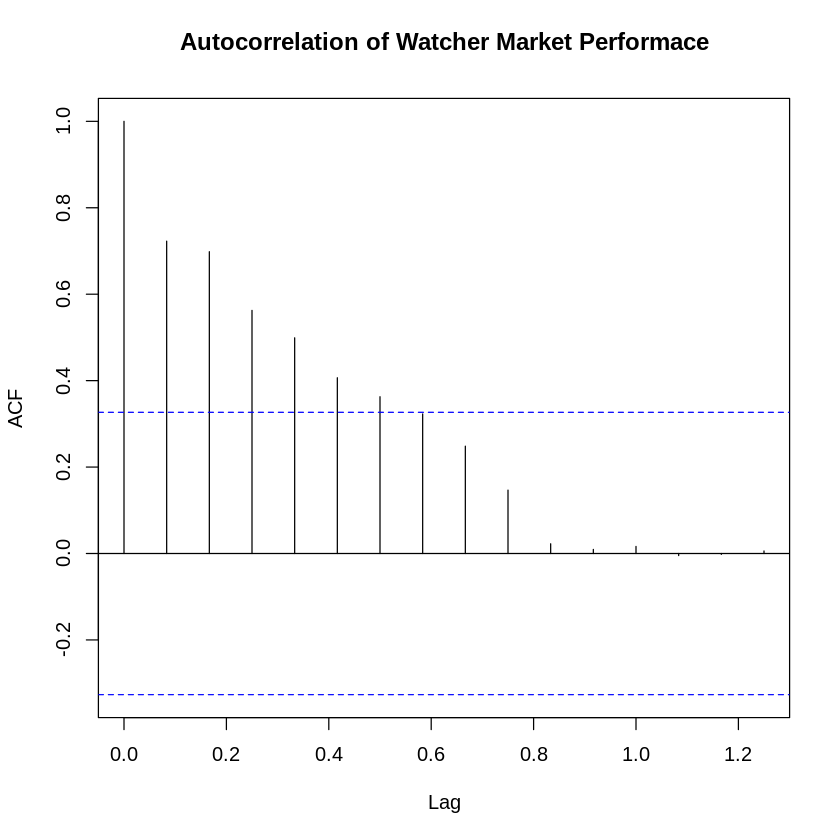

In [ ]:
acf(watcher_perf_ts,main = "Autocorrelation of Watcher Market Performace")

The lag shows that the ACF decreases as the lag increases, wherein from 0 to 0.5 lag shows that the data points are highly significantly correlated with each other. However, beyond that the autocorrelation is not significant.

### **Model Building**

In [ ]:
watcher_perf_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2018,39.00962,43.32585,51.96424,44.09742,52.47325,62.35803,60.26790,76.47563,61.20967,64.93075,74.06593,105.67210
2019,62.18597,104.85437,60.24640,83.43456,76.90921,71.77094,96.48639,96.99845,82.78128,60.59309,87.69929,98.08806
2020,98.02720,111.33903,131.00314,110.20812,114.51653,110.22273,127.58654,119.97100,125.23659,143.13435,121.40476,115.93557


In [ ]:
# Create 3 models from tlsm(), ets(), and arima
#TLSM
time_ind <- time(watcher_perf_ts)
tlsm_model <- lm(watcher_perf_ts ~ time_ind)
summary(tlsm_model)


Call:
lm(formula = watcher_perf_ts ~ time_ind)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.227  -6.449  -1.035   5.239  33.903 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -58197.373   5152.438  -11.29 4.72e-13 ***
time_ind        28.862      2.551   11.31 4.53e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.25 on 34 degrees of freedom
Multiple R-squared:  0.7901,	Adjusted R-squared:  0.7839 
F-statistic:   128 on 1 and 34 DF,  p-value: 4.53e-13


In [ ]:
ets_model <- ets(watcher_perf_ts,model = "AAN")
summary(ets_model)

ETS(A,A,N) 

Call:
ets(y = watcher_perf_ts, model = "AAN")

  Smoothing parameters:
    alpha = 1e-04 
    beta  = 1e-04 

  Initial states:
    l = 41.1797 
    b = 2.4739 

  sigma:  13.6944

     AIC     AICc      BIC 
323.1893 325.1893 331.1069 

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.4304408 12.91117 9.230122 -1.602104 11.18028 0.3091398
                    ACF1
Training set -0.05925756

In [ ]:
arima_auto_model = auto.arima(watcher_perf_ts,seasonal = FALSE)
summary(arima_auto_model)

Series: watcher_perf_ts 
ARIMA(1,1,0) 

Coefficients:
          ar1
      -0.5526
s.e.   0.1361

sigma^2 = 251.9:  log likelihood = -146.1
AIC=296.19   AICc=296.57   BIC=299.31

Training set error measures:
                   ME     RMSE      MAE      MPE    MAPE      MASE       ACF1
Training set 3.382662 15.42492 12.47678 2.368342 14.7867 0.4178783 -0.1535312

### **Model Evaluation**

In [ ]:
n<- length(watcher_perf_ts)
k<- length(coef(tlsm_model))
AICc_tlsm <- AIC(tlsm_model)+ (2 * k * (k + 1)) / (n - k - 1)

aicc_table <- data.frame(
  Model = c("TLSM","ETS","ARIMA"),
  AICc = c(AICc_tlsm,ets_model$aicc,arima_auto_model$aicc)
)
aicc_table

Model,AICc
<chr>,<dbl>
TLSM,292.5300
ETS,325.1893
ARIMA,296.5699


In [ ]:
train <- window(watcher_perf_ts, end = c(2019, 12))
test  <- window(watcher_perf_ts, start = c(2020, 1))
h <- length(test)

time_ind <- time(train)
tlsm_model <- lm(train ~ time_ind)
ets_model <- ets(train, model = "AAN")
arima_auto_model <- auto.arima(train, seasonal = FALSE)

tlsm_forecast <- forecast(
  tlsm_model,
  newdata = data.frame(time_ind = time(test))
)$mean
tlsm_forecast <- ts(tlsm_forecast, start = start(test), frequency = frequency(test))

ets_forecast <- forecast(ets_model, h = h)$mean
ets_forecast <- ts(ets_forecast, start = start(test), frequency = frequency(test))

arima_forecast <- forecast(arima_auto_model, h = h)$mean
arima_forecast <- ts(arima_forecast, start = start(test), frequency = frequency(test))

forecast_evaluation_metrics <- data.frame(
  Model = c("TLSM", "ETS", "ARIMA"),
  RMSE = c(accuracy(tlsm_forecast, test)["Test set","RMSE"],
           accuracy(ets_forecast, test)["Test set","RMSE"],
           accuracy(arima_forecast, test)["Test set","RMSE"]),
  MAE  = c(accuracy(tlsm_forecast, test)["Test set","MAE"],
           accuracy(ets_forecast, test)["Test set","MAE"],
           accuracy(arima_forecast, test)["Test set","MAE"]),
  MAPE = c(accuracy(tlsm_forecast, test)["Test set","MAPE"],
           accuracy(ets_forecast, test)["Test set","MAPE"],
           accuracy(arima_forecast, test)["Test set","MAPE"]),
  MPE  = c(accuracy(tlsm_forecast, test)["Test set","MPE"],
           accuracy(ets_forecast, test)["Test set","MPE"],
           accuracy(arima_forecast, test)["Test set","MPE"])
)

forecast_evaluation_metrics

Model,RMSE,MAE,MAPE,MPE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
TLSM,15.42810,12.30686,9.838952,9.554053
ETS,26.30366,24.24029,19.757201,19.757201
ARIMA,18.21300,15.47667,12.546986,12.546986


The models used a test data in order to ddetermine the performance of the model through 4 forcast metrics which are: RMSE, MAE, MAPE, and MPE. Where the smaller values have indicates the better model, wherein we can observe given by the table above that the better model in terms of smaller error values is the TLSM model or our linear model then our auto arima model comes second and lastly our ets model comes last with the largest error amongst the other models. The linear model was able to outshine other models due to the string trend that the series is providing. Model performance in terms of adjusted AIC is also seen within the first table where our linear model has a lowest value ammongst other models.


	Box-Ljung test

data:  residuals(tlsm_model)
X-squared = 9.6295, df = 12, p-value = 0.6484



	Ljung-Box test

data:  Residuals from ETS(A,Ad,N)
Q* = 4.3344, df = 5, p-value = 0.5023

Model df: 0.   Total lags used: 5



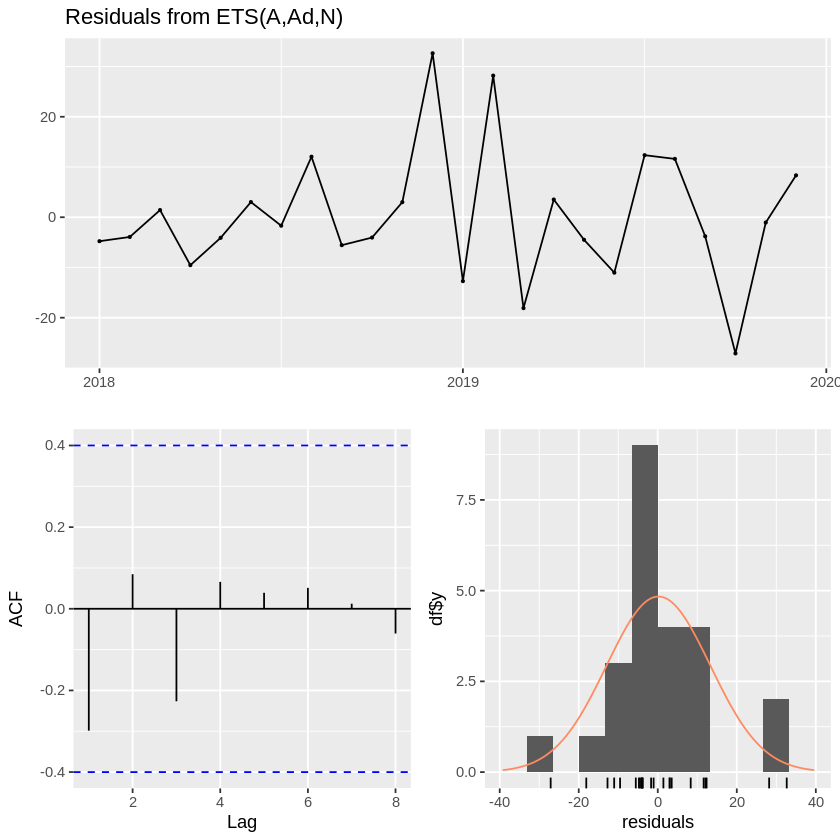


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1) with drift
Q* = 1.3851, df = 3, p-value = 0.709

Model df: 2.   Total lags used: 5



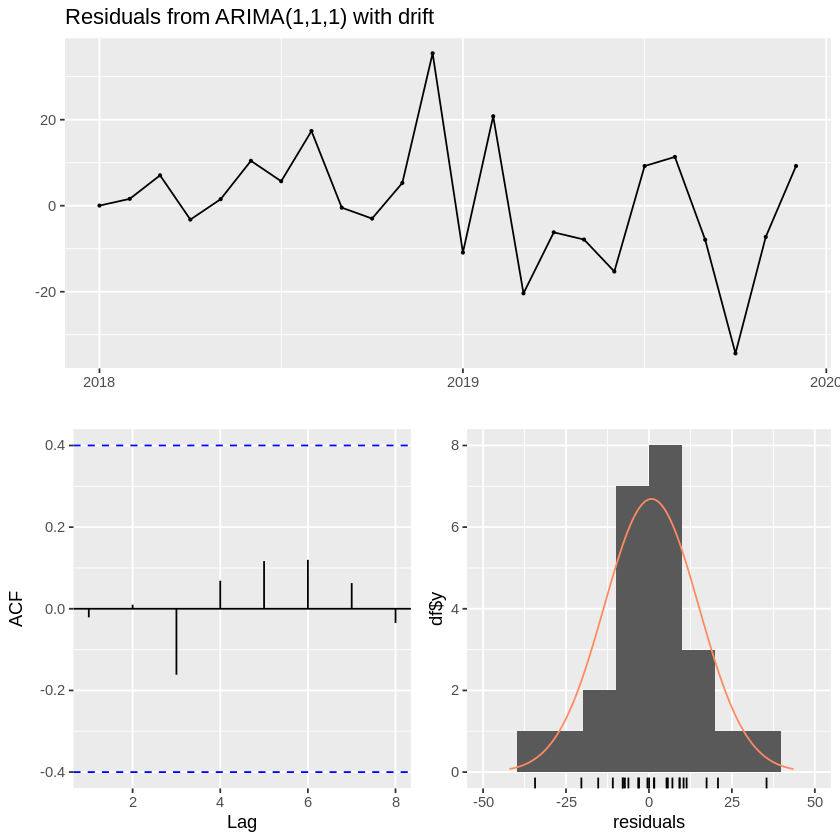

In [ ]:
Box.test(residuals(tlsm_model),lag = 12, type = "Ljung-Box")
checkresiduals(ets_model)
checkresiduals(arima_auto_model)

Based on the Ljung-Box test that examines the autocorrelation between residuals it produced a p value of greater than 0.05 which indicates that for the 3 created models the assumption for the residual behavior to be independent is satisfied.

### **Recommendations**

Given the strong evaluation scores of the linear model and the strong trend given by the series we can conclude that the most appropriate model to be used is the linear model, however in a real life scenario the performance of a given company cannot be always have a positive upward performance and can keep that consistent performance, where we might need to determine if a potential of dampening that performance is possible, indicating that domain knowledge of the company and setting itself is essential to assess whether the observed trend is sustainable.

We must take into consideration in the future models that account for dampaning or non linear trends to better reflect real world scenarios and reflect a  longer forcast, however for the purposes of this modeling for a given short to medium forcast we can determine that the lienar model is appropriately sufficient enough for determining the future performance of the company.

### **Imports and Installations**

In [ ]:
install.packages("tsibble")
install.packages("forecast")
install.packages("psych")
install.packages("tseries")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘BH’, ‘anytime’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(forecast)
library(tsibble)
library(psych)
library(tseries)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 method overwritten by 'tsibble':
  method               from 
  as_tibble.grouped_df dplyr


Attaching package: ‘tsibble’


The following object is masked from ‘package:lubridate’:

    interval


The following objects are masked from ‘package:base’:

    intersect, setdiff, union



Attaching package: ‘psych’


The following objects are masked from ‘package:gg